In [36]:
import pandas as pd
import os
import pymysql
pymysql.install_as_MySQLdb()
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
import matplotlib.dates as mdates
import datetime
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.sql import func
from flask import Flask, jsonify

In [3]:
csvpath_measurements = os.path.join("resources/hawaii_measurements.csv")
hawaii_measurements = pd.read_csv(csvpath_measurements)
hawaii_measurements_df = pd.DataFrame(hawaii_measurements)

clean_him_df = hawaii_measurements_df[np.isfinite(hawaii_measurements_df['prcp'])]

clean_him_df.to_csv('clean_him.csv', index=True)
clean_him_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
5,USC00519397,2010-01-07,0.06,70


In [5]:
csvpath_stations = os.path.join("resources/hawaii_stations.csv")
hawaii_stations = pd.read_csv(csvpath_stations)

clean_hs_df = pd.DataFrame(hawaii_stations)
clean_hs_df.to_csv('clean_hs.csv', index=True)
clean_hs_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [6]:
csvpath_measurements = os.path.join('clean_him.csv')
clean_him = pd.read_csv(csvpath_measurements)
clean_him = pd.DataFrame(clean_him)

clean_him_df = clean_him.rename(columns={'Unnamed: 0': 'id'})
clean_him_df.head()

,id,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,5,USC00519397,2010-01-07,0.06,70


In [7]:
csvpath_stations = os.path.join('clean_hs.csv')
clean_hs = pd.read_csv(csvpath_stations)
clean_hs = pd.DataFrame(clean_hs)

clean_hs_df = clean_hs.rename(columns={'Unnamed: 0': 'id'})
clean_hs_df

,id,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [8]:
class Measurements(Base):
    __tablename__ = 'measurements'
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(Integer)
    prcp = Column(Integer)
    tobs = Column(Integer)
    extend_existing=True

In [9]:
class Stations(Base):
    __tablename__ = 'stations'
    id = Column(Integer, primary_key=True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Integer)
    longitude = Column(Integer)
    elevation = Column(Integer)
    extend_existing=True

In [10]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [11]:
Base.metadata.create_all(engine)

session = Session(bind=engine)

In [12]:
engine = create_engine('sqlite:///hawaii.sqlite')

# Create tables in database
Base.metadata.create_all(engine)

# Start session
session = Session(bind=engine)

In [13]:
Base = automap_base()

In [14]:
Base.prepare(engine, reflect=True)

In [15]:
Base.classes.keys()

['measurements', 'stations']

In [41]:
#inspector = inspect(engine)
#inspector.get_table_names()

In [17]:
file_name = 'clean_him.csv'
clean_him_df = pd.read_csv(file_name)
clean_him_df.to_sql(con=engine, name='measurements', if_exists='replace')

file_name2 = 'clean_hs.csv'
clean_hs_df = pd.read_csv(file_name2)
clean_hs_df.to_sql(con=engine, name='stations', if_exists='replace')

In [18]:
HI_measurements = Base.classes.measurements

list(HI_measurements.__table__.columns)

[Column('id', INTEGER(), table=<measurements>, primary_key=True, nullable=False),
 Column('station', VARCHAR(), table=<measurements>),
 Column('date', INTEGER(), table=<measurements>),
 Column('prcp', INTEGER(), table=<measurements>),
 Column('tobs', INTEGER(), table=<measurements>)]

In [19]:
measurements_query = (session
                      .query(HI_measurements.date, 
                             HI_measurements.prcp)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .all())

for row in measurements_query:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('2016-10-12', 0.0)
('20

('2016-09-15', 0.83)
('2016-09-16', 0.06)
('2016-09-17', 0.36)
('2016-09-18', 0.07)
('2016-09-19', 0.01)
('2016-09-20', 0.22)
('2016-09-21', 0.07)
('2016-09-22', 0.34)
('2016-09-23', 0.94)
('2016-09-24', 0.01)
('2016-09-25', 0.03)
('2016-09-26', 0.17)
('2016-09-27', 0.17)
('2016-09-28', 0.0)
('2016-09-29', 0.59)
('2016-09-30', 0.25)
('2016-10-01', 0.14)
('2016-10-02', 0.06)
('2016-10-03', 0.16)
('2016-10-04', 0.03)
('2016-10-05', 0.01)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.28)
('2016-10-12', 0.03)
('2016-10-13', 0.0)
('2016-10-14', 0.0)
('2016-10-15', 0.04)
('2016-10-16', 0.0)
('2016-10-17', 0.01)
('2016-10-18', 0.02)
('2016-10-19', 0.11)
('2016-10-20', 0.0)
('2016-10-21', 0.0)
('2016-10-22', 0.15)
('2016-10-23', 0.02)
('2016-10-24', 0.08)
('2016-10-25', 0.11)
('2016-10-26', 0.01)
('2016-10-27', 0.22)
('2016-10-28', 0.05)
('2016-10-29', 0.1)
('2016-10-30', 0.16)
('2016-10-31', 0.07)
('2016-11-01', 0.1)
('201

In [20]:
mq_df = pd.DataFrame(measurements_query, columns=['date', 'prcp'])

mq_df.set_index('date', inplace=True)
mq_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [24]:
prcp_result = [(prcp[1]) for prcp in measurements_query]


date_result = [(date[0]) for date in measurements_query]

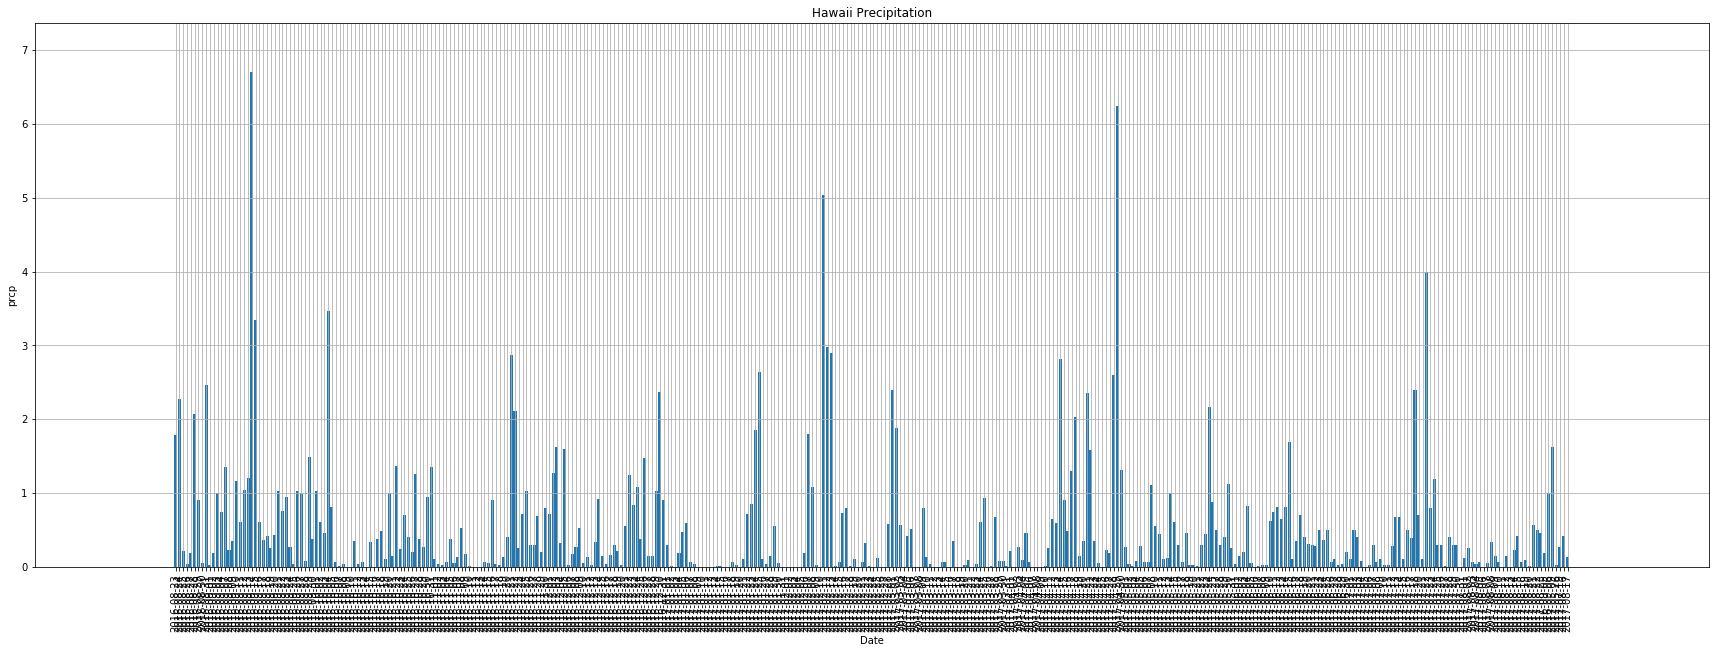

In [25]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
plt.bar(date_result, prcp_result)
plt.xlabel('Date')
plt.ylabel('prcp')
plt.margins(0.1)
plt.title('Hawaii Precipitation')
plt.grid()
plt.show()

In [26]:
HI_stations = Base.classes.stations

list(HI_stations.__table__.columns)

[Column('id', INTEGER(), table=<stations>, primary_key=True, nullable=False),
 Column('station', VARCHAR(), table=<stations>),
 Column('name', VARCHAR(), table=<stations>),
 Column('latitude', INTEGER(), table=<stations>),
 Column('longitude', INTEGER(), table=<stations>),
 Column('elevation', INTEGER(), table=<stations>)]

In [27]:
stations_count = (session
                  .query(HI_stations.station)
                  .count())
stations_count

9

In [28]:
active_stations = (session
                   .query(HI_measurements.station, func.count(HI_measurements.date))
                   .order_by(func.count(HI_measurements.date).desc())
                   .group_by(HI_measurements.station)
                   .all())
active_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [29]:
tobs_query = (session
              .query(HI_measurements.date, 
                     HI_measurements.station,
                     HI_measurements.tobs)
              .filter(HI_measurements.date <= '2017-08-23')
              .filter(HI_measurements.date >= '2016-08-23')
              .order_by(HI_measurements.date)
              .all())

for row in tobs_query:
    print(row)

('2016-08-23', 'USC00519397', 81)
('2016-08-23', 'USC00513117', 76)
('2016-08-23', 'USC00514830', 80)
('2016-08-23', 'USC00519523', 80)
('2016-08-23', 'USC00519281', 77)
('2016-08-23', 'USC00516128', 74)
('2016-08-24', 'USC00519397', 79)
('2016-08-24', 'USC00513117', 76)
('2016-08-24', 'USC00514830', 80)
('2016-08-24', 'USC00519523', 79)
('2016-08-24', 'USC00519281', 77)
('2016-08-24', 'USC00516128', 74)
('2016-08-25', 'USC00519397', 80)
('2016-08-25', 'USC00513117', 77)
('2016-08-25', 'USC00514830', 81)
('2016-08-25', 'USC00517948', 81)
('2016-08-25', 'USC00519523', 80)
('2016-08-25', 'USC00519281', 80)
('2016-08-25', 'USC00516128', 77)
('2016-08-26', 'USC00519397', 79)
('2016-08-26', 'USC00513117', 78)
('2016-08-26', 'USC00514830', 81)
('2016-08-26', 'USC00517948', 81)
('2016-08-26', 'USC00519523', 84)
('2016-08-26', 'USC00519281', 80)
('2016-08-27', 'USC00519397', 77)
('2016-08-27', 'USC00513117', 73)
('2016-08-27', 'USC00514830', 81)
('2016-08-27', 'USC00519523', 81)
('2016-08-27',

('2017-04-03', 'USC00514830', 77)
('2017-04-03', 'USC00519523', 76)
('2017-04-03', 'USC00519281', 70)
('2017-04-03', 'USC00516128', 73)
('2017-04-04', 'USC00519397', 76)
('2017-04-04', 'USC00513117', 72)
('2017-04-04', 'USC00514830', 76)
('2017-04-04', 'USC00517948', 75)
('2017-04-04', 'USC00519523', 78)
('2017-04-04', 'USC00519281', 67)
('2017-04-04', 'USC00516128', 75)
('2017-04-05', 'USC00519397', 78)
('2017-04-05', 'USC00513117', 72)
('2017-04-05', 'USC00514830', 77)
('2017-04-05', 'USC00517948', 73)
('2017-04-05', 'USC00519523', 77)
('2017-04-05', 'USC00519281', 71)
('2017-04-05', 'USC00516128', 69)
('2017-04-06', 'USC00519397', 77)
('2017-04-06', 'USC00513117', 73)
('2017-04-06', 'USC00514830', 76)
('2017-04-06', 'USC00517948', 73)
('2017-04-06', 'USC00519523', 76)
('2017-04-06', 'USC00519281', 67)
('2017-04-06', 'USC00516128', 72)
('2017-04-07', 'USC00519397', 77)
('2017-04-07', 'USC00513117', 74)
('2017-04-07', 'USC00514830', 76)
('2017-04-07', 'USC00517948', 76)
('2017-04-07',

In [32]:
tobs_df = pd.DataFrame(tobs_query, columns=['date','station','tobs'])
tobs_only = tobs_df['tobs']


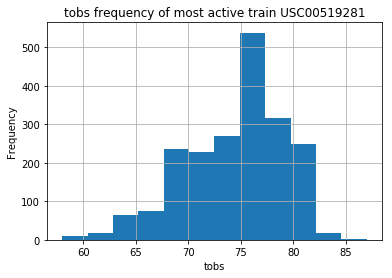

In [33]:
plt.hist(tobs_only, bins=12)
plt.xlabel('tobs')
plt.ylabel('Frequency')
plt.title('Tobs Frequency of Most Active Train USC00519281')
plt.grid()

plt.show()


In [34]:
#temp analysis
def calc_temps(start_date, end_date):
    
    start_date_new = datetime.datetime.strptime(start_date, "%Y-%m-%d") - datetime.timedelta(days=365)
    end_date_new = datetime.datetime.strptime(end_date, "%Y-%m-%d") - datetime.timedelta(days=365)
    
    tobs_query_new = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date.between(start_date_new, end_date_new))
                      .all())
    
    tqn_df = pd.DataFrame(tobs_query_new)
    
    min_temp = tqn_df.min()
    max_temp = tqn_df.max()
    avg_temp = tqn_df.mean()
    yerr_temp = max_temp - min_temp
    

    
    plt.figure(figsize=(4, 8))
    plt.tick_params(bottom='off', top='off', labelbottom='off')
    plt.bar(1, avg_temp, yerr=yerr_temp)
    plt.ylabel('Temp (F)')
    plt.title('Trip average temp')
    plt.grid()
    plt.show()

C:\Users\EriMe\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


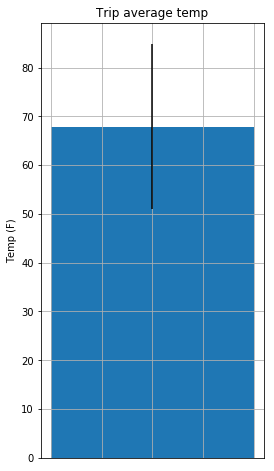

<function __main__.calc_temps(start_date, end_date)>

In [35]:
start_date = '2018-01-01'
end_date = '2018-01-10'
calc_temps(start_date, end_date)
calc_temps

In [37]:
app = Flask(__name__)

@app.route('/api/v1.0/precipitation') 
def precipitation():
    print("Server received request for 'Precipitation' page...")
    return "Here are the dates and temperature observations from last year!"

    last_year_temp = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .order_by(HI_measurements.date)
                      .all())

    
    
    dates_and_temp = []
    for date in last_year_temp:
        date_dict ={}
        date_dict['date'] = HI_measurements.date
        date_dict['temperature'] = HI_measurements.tobs
        dates_and_temp.append(date_dict)
    
    return jsonify(dates_and_temp)

In [38]:
@app.route('/api/v1.0/stations') 
def stations():
    print("Server received request for 'Stations' page...")
    return "Here is the list of stations from the dataset!"

    stations_query = (session
                      .query(HI_stations.stations)
                      .all())
    
    return jsonify(stations_query)

In [39]:
@app.route('/api/v1.0/tobs') 
def tobs():
    print("Server received request for 'Temperature Observations' page...")
    return "Here is the list of Temperature Observations (tobs) for the previous year!"
    
    tobs_last_year = (session
                      .query(HI_measurements.tobs)
                      .filter(HI_measurements.date <= '2017-08-23')
                      .filter(HI_measurements.date >= '2016-08-23')
                      .order_by(HI_measurements.tobs)
                      .all())
    
    return jsonify(tobs_last_year)

In [40]:
@app.route('/api/v1.0/<start>)') 
def tobs_start():
    print("Server received request for 'Min Temp, Avg Temp, Max Temp of a given start' page...")
    return "Here is the list of Temperature information for the a given date!"
    
    start = HI_measurements.date <= '2010-01-01'
    end = HI_measurements.date >= '2017-08-23'
    tobs_start_only = (session
                       .query(HI_measurements.tobs)
                       .filter(HI_measurements.date.between(start, '2017-08-23'))
                       .all())
    
    tso_df = pd.DataFrame(tobs_start_only)
    tmin = tso_df.min()
    tmax = tso_df.max()
    tavg = tso_df.avg()
    
    return jsonify(tmin, tmax, tavg)

@app.route('/api/v1.0/<start>/<end>') 
def tobs_given_range():
    
    print("Server received request for 'Min Temp, Avg Temp, Max Temp of a given start or date range' page...")
    return "Here is the list of Temperature information for the a given date range!"
    
    tobs_given_range = (session
                        .query(HI_measurements.tobs)
                        .filter(HI_measurements.date.between(start, end))
                        .all())
    
    tgr_df = pd.DataFrame(tobs_given_range)
    
    t2min = tgr_df.min()
    t2max = tgr_df.max()
    t2avg = tgr_df.avg()
    
    return jsonify(t2min, t2max, t2avg)